# Taiwon Bankrupt data(json)

### Imbalanced Data.

In this lesson, i am going to explore some of the features of the dataset, use visualizations to help me understand those features, and develop a model that solves the problem of imbalanced data by under- and over-sampling.

**Importing Libraries**

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pickle

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

**Creating a Wrangling Function**

In [2]:
def wrangle(file_path):
    df = pd.read_json(file_path)
    
    df ["bankrupt"] = df["Bankrupt?"]>0
    
    df.drop(columns=["Bankrupt?", "Total expense", "Total income", "Current Liabilities", "Inventory", "Working Capital", "Current Assets", "Quick Assets", "Cash",
                "Inventory and accounts receivable", "Net profit before tax", "Operating profit", "Contingent liabilities", "Net worth",
                 "Total debt", "Non-industry income and expenditure"], inplace=True)
    
    return df

In [5]:
df = wrangle(r"C:\Users\Gbest\Desktop\my_wqu_project\polish_bankruptcy_data\taiwon_bankruptcy_data.json")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 77 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1   ROA(A) before interest and % after tax                   6819 non-null   float64
 2   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3   Operating Gross Margin                                   6819 non-null   float64
 4   Realized Sales Gross Margin                              6819 non-null   float64
 5   Operating Profit Rate                                    6819 non-null   float64
 6   Pre-tax net Interest Rate                                6819 non-null   float64
 7   After-tax net Interest Rate                              6819 non-null   float64
 8   Continuous interest rate (af

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Continuous interest rate (after tax),Operating Expense Rate,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.780985,1.256969e-04,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,True
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.781506,2.897851e-04,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,True
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.780284,2.361297e-04,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,True
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.781241,1.078888e-04,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,True
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.781550,7.890000e+09,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,True


### Exploratory Data Analysis(EDA).

 Create a bar chart of the value counts for the "bankrupt" column. calculate the relative frequencies of the classes, not the raw count, so be sure to set the normalize argument to True.

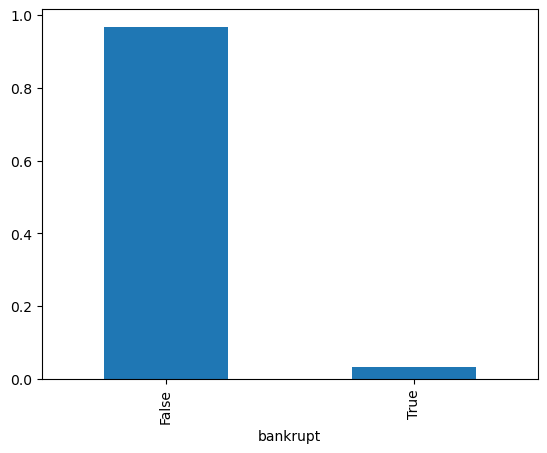

In [7]:
df["bankrupt"].value_counts(normalize=True).plot(kind="bar");

That's good news for Poland's economy! Since it looks like most of the companies in our dataset are doing all right for themselves, let's drill down a little farther. However, it also shows us that we have an imbalanced dataset, where our majority class is far bigger than our minority class.

 It might be useful to understand where the values for one of these features cluster, so let's make a boxplot to see how the values are distributed

Use seaborn to create a boxplot that shows the distributions of the "feat_27" column for both groups in the "bankrupt" column. Remember to label your axes.

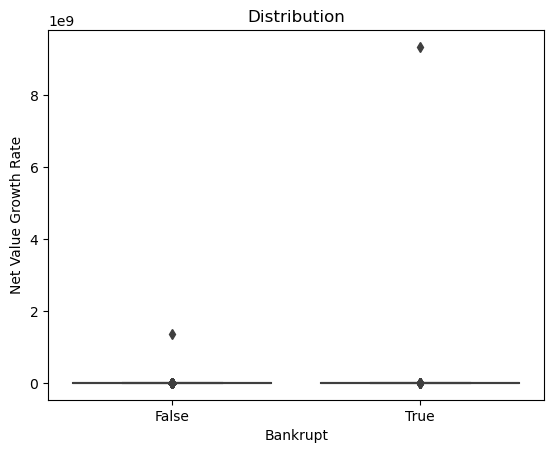

In [10]:
sns.boxplot(x="bankrupt", y="Net Value Growth Rate", data=df)
plt.xlabel("Bankrupt")
plt.ylabel("Net Value Growth Rate")
plt.title("Distribution");

In [102]:
df["Net Value Growth Rate"].describe().apply("{0:,.0f}".format)

count            6,819
mean         1,566,212
std        114,159,390
min                  0
25%                  0
50%                  0
75%                  0
max      9,330,000,000
Name: Net Value Growth Rate, dtype: object

Create a histogram of "feat_27". Make sure to label x-axis "POA / financial expenses", the y-axis "Count", and use the title "Distribution of Profit/Expenses Ratio".

<Axes: >

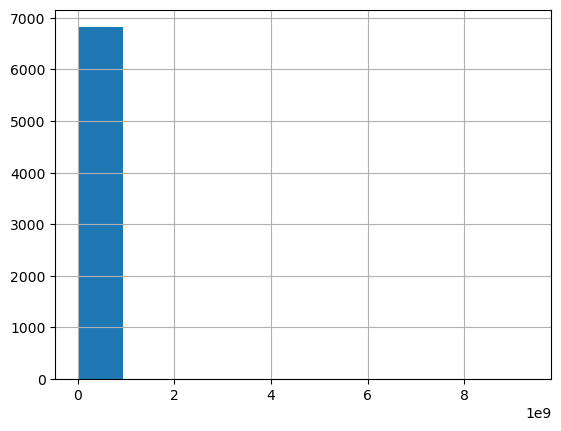

In [100]:
df["Net Value Growth Rate"].hist()

Aha! We saw it in the numbers and now we see it in the histogram. The data is very skewed. So, in order to create a helpful boxplot, we need to trim the data.

Recreate the boxplot that you made above, this time only using the values for that fall between the 0.1 and 0.9 quantiles for the column

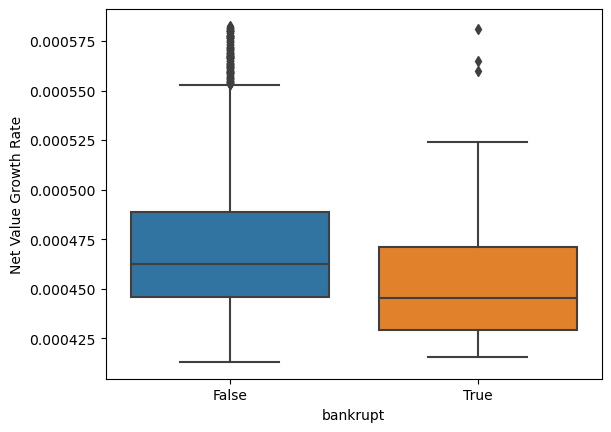

In [13]:
low, high = df["Net Value Growth Rate"].quantile([0.1, 0.9])
mask = df["Net Value Growth Rate"].between(low, high)
sns.boxplot(x="bankrupt", y="Net Value Growth Rate", data=df[mask]);

### Split


So let's start building that model. If you need a refresher on how and why we split data in these situations, take a look back at the Time Series module.

Creating feature matrix X and target vector y. The target is "bankrupt".

In [14]:
target = "bankrupt"

y = df[target]
X = df.drop(columns=[target])

Dividing the data (X and y) into training and test sets using a randomized train-test split. validation set should be 20% of your total data. And don't forget to set a random_state for reproducibility.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5455, 76)
(5455,)
(1364, 76)
(1364,)


### Resample

Now that i split the data into training and test sets, i can address the class imbalance we saw during our EDA. One strategy is to resample the training data. There are many ways to do this, so let's start with under-sampling.

In [17]:
under_sampler = RandomUnderSampler(random_state=40)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

print(X_train_under.shape)
X_train_under.head()

(342, 76)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Continuous interest rate (after tax),Operating Expense Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.564374,0.624455,0.613577,0.600455,0.600427,0.999016,0.797468,0.809379,0.781642,6.260000e+09,...,0.845388,0.006112,0.623812,0.600457,0.844677,0.281581,0.026838,0.565372,1,0.024261
1,0.462000,0.519679,0.512929,0.598985,0.598985,0.998926,0.797332,0.809270,0.781525,1.296285e-04,...,0.787594,0.000622,0.623548,0.598986,0.839160,0.283248,0.026512,0.563347,1,0.021531
2,0.435724,0.465547,0.474811,0.594387,0.594402,0.998768,0.796973,0.808873,0.781250,2.140432e-04,...,0.752306,0.001315,0.624097,0.594386,0.836252,0.280576,0.026690,0.564622,1,0.026653
3,0.573636,0.630397,0.616093,0.623467,0.623265,0.999255,0.797745,0.809591,0.781868,1.898751e-04,...,0.848944,0.001411,0.623961,0.623467,0.843098,0.276382,0.026793,0.565168,1,0.067161
4,0.494857,0.556640,0.549815,0.623942,0.623813,0.999025,0.797460,0.809380,0.781645,4.283176e-04,...,0.810739,0.000834,0.623821,0.623941,0.840922,0.276660,0.026794,0.565173,1,0.059145


In [18]:
y_train_under.value_counts(normalize=True)

bankrupt
False    0.5
True     0.5
Name: proportion, dtype: float64

Create a new feature matrix X_train_over and target vector y_train_over by performing random over-sampling on the training data.

In [19]:
over_sampler = RandomOverSampler(random_state=40)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

print(X_train_over.shape)
X_train_over.head()

(10568, 76)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Continuous interest rate (after tax),Operating Expense Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.458685,0.454154,0.508432,0.576111,0.576111,0.998487,0.796446,0.808405,0.780658,2.015544e-04,...,0.744635,0.003754,0.623349,0.576107,0.835667,0.280350,0.026620,0.564182,1,0.027308
1,0.460830,0.511121,0.512875,0.613824,0.613846,0.999073,0.797296,0.809228,0.781469,2.204032e-04,...,0.779891,0.003578,0.623892,0.613825,0.838791,0.279278,0.026504,0.563281,1,0.031291
2,0.534052,0.582316,0.579046,0.604715,0.604715,0.999086,0.797629,0.809488,0.781761,6.060000e+09,...,0.824112,0.002887,0.622335,0.604710,0.842178,0.279005,0.026815,0.565268,1,0.032620
3,0.435187,0.503598,0.502543,0.614869,0.615150,0.998929,0.797187,0.809198,0.781445,3.859946e-04,...,0.778489,0.000431,0.623888,0.614866,0.838912,0.277383,0.026787,0.565138,1,0.046061
4,0.521279,0.611971,0.575245,0.661994,0.661994,0.999586,0.798297,0.810146,0.782231,4.800071e-04,...,0.830972,0.005061,0.625087,0.661992,0.843016,0.280308,0.026856,0.565449,1,0.027435


In [20]:
y_train_over.value_counts()

bankrupt
False    5284
True     5284
Name: count, dtype: int64

### baseline

As always, we need to establish the baseline for our model. Since this is a classification problem, we'll use accuracy score.

In [22]:
mae_acc = y_train.value_counts(normalize=True).max()
print("MAE accuracy:", round(mae_acc, 2))

MAE accuracy: 0.97


Creating three identical models: model_reg, model_under and model_over. All of them should use a SimpleImputer followed by a DecisionTreeClassifier. Train model_reg using the unaltered training data. For model_under, use the undersampled data. For model_over, use the oversampled data.

In [21]:
model_reg= make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=40)
).fit(X_train, y_train)

model_under= make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=40)
).fit(X_train_under, y_train_under)

model_over= make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=40)
).fit(X_train_over, y_train_over)

Calculate training and test accuracy for your three models.

In [23]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)
    
    print("accuracy train:", acc_train.round(4))
    print("accuracy test:", acc_test.round(4))

accuracy train: 1.0
accuracy test: 0.9523
accuracy train: 0.8203
accuracy test: 0.8101
accuracy train: 1.0
accuracy test: 0.9531


As we mentioned earlier, "good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

Plot a confusion matrix that shows how your best model performs on your validation set.

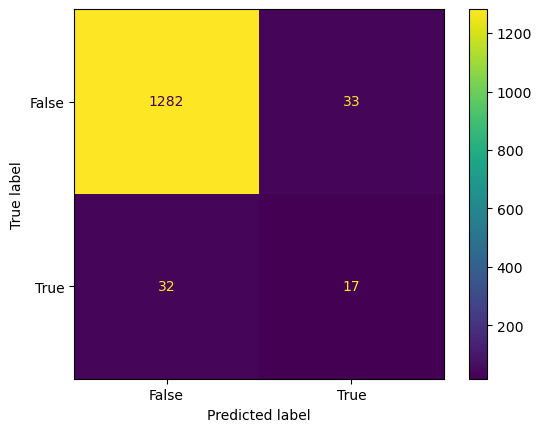

In [24]:
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test);

In [25]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
depth

42

### Communicate

Now that we have a reasonable model, let's graph the importance of each feature.

Create a horizontal bar chart with the 15 most important features for model_over. Be sure to label your x-axis "Gini Importance"

In [26]:
feature = X_train_over.columns
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

In [27]:
feat_imp = pd.Series(importances, index=feature).sort_values()

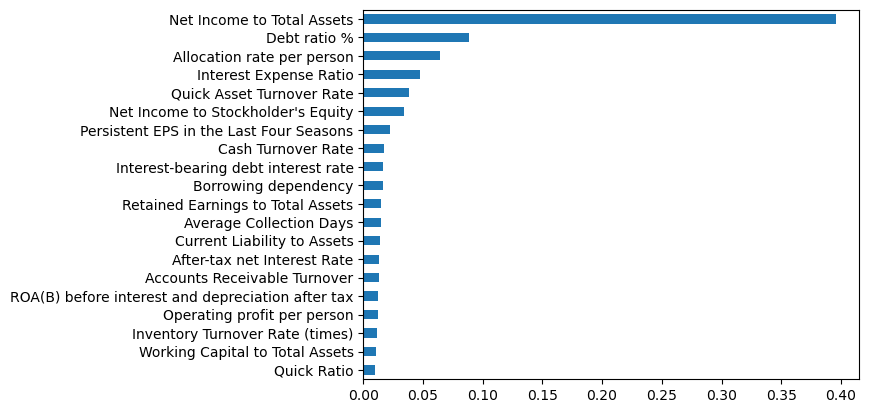

In [28]:
feat_imp.tail(20).plot(kind="barh");

In [149]:
with open("model-5-2.pkl", "wb") as f:
    pickle.dump(model_over, f)

In [150]:
with open("model-5-2.pkl", "rb")as f:
    loaded_model=pickle.load(f)
    
print(loaded_model)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=40))])
